# Testing of the Current Feature Detection Functionality

In essence, this is a part of the notebook `Example_OLR_Tracking_satellite.ipynb` in which only the feature detection part is retained. 



## Run the original notebook

In [2]:
%matplotlib inline

import iris
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt


In [3]:
import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

In [4]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)


Download example data:

In [5]:
import urllib
file_path='http://gws-access.ceda.ac.uk/public/acpc/mheiken/Tracking/Small_Example/Example_OLR_satellite/Example_input_OLR_satellite.nc'
data_dir='Data'
os.makedirs(data_dir,exist_ok=True)
data_file=os.path.join(data_dir,'data.nc')
request=urllib.request.urlretrieve(file_path,data_file)

Load Data from downloaded file:

In [6]:
OLR=iris.load_cube(data_file,'OLR')


In [7]:
OLR

<iris 'Cube' of OLR / (W m^-2) (time: 16; latitude: 131; longitude: 184)>

In [8]:
savedir='Save_OLR_Satellite'
os.makedirs(savedir,exist_ok=True)


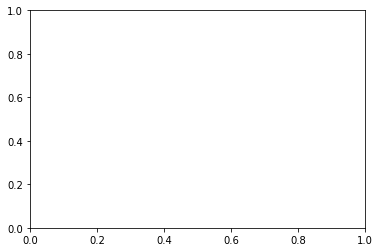

In [9]:
import tobac
import importlib
importlib.reload( tobac )

%config tobac.log_level="DEBUG"
from tobac import get_spacings,feature_detection_multithreshold,segmentation_2D,linking_trackpy


In [10]:
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_num']=4
parameters_features['target']='minimum'
parameters_features['threshold']=[250,225,200,175,150]




In [11]:
dxy,dt=get_spacings(OLR,grid_spacing=4000)
Features=feature_detection_multithreshold(OLR,dxy,**parameters_features)
Features.to_hdf(os.path.join(savedir,'Features.h5'),'table')

## Test the Feature Data

In [56]:
Features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude
0,0,2,23.000000,173.000000,1,250,1,2013-06-19 21:32:23,2013-06-19 21:32:23,28.910470,-88.386986
1,0,6,34.000000,110.000000,1,250,2,2013-06-19 21:32:23,2013-06-19 21:32:23,29.330235,-90.791096
2,0,8,41.730609,65.554883,10,250,3,2013-06-19 21:32:23,2013-06-19 21:32:23,29.625239,-92.487142
3,0,9,42.433674,72.072979,4,250,4,2013-06-19 21:32:23,2013-06-19 21:32:23,29.652068,-92.238409
4,0,10,48.641181,164.496537,26,250,5,2013-06-19 21:32:23,2013-06-19 21:32:23,29.888949,-88.711482
5,0,11,48.000000,74.434266,2,250,6,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-92.148301
6,0,12,48.000000,143.000000,1,250,7,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-89.531800
7,0,13,49.000000,139.706587,2,250,8,2013-06-19 21:32:23,2013-06-19 21:32:23,29.902642,-89.657479
8,0,16,53.000000,115.000000,1,250,9,2013-06-19 21:32:23,2013-06-19 21:32:23,30.055284,-90.600294
9,0,17,60.000000,135.534993,2,250,10,2013-06-19 21:32:23,2013-06-19 21:32:23,30.322407,-89.816669


In [15]:
type( Features )

pandas.core.frame.DataFrame

In [16]:
Features.columns

Index(['frame', 'idx', 'hdim_1', 'hdim_2', 'num', 'threshold_value', 'feature',
       'time', 'timestr', 'latitude', 'longitude'],
      dtype='object')

In [55]:
fsub = Features[Features.frame == 0]

fsub

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude
0,0,2,23.000000,173.000000,1,250,1,2013-06-19 21:32:23,2013-06-19 21:32:23,28.910470,-88.386986
1,0,6,34.000000,110.000000,1,250,2,2013-06-19 21:32:23,2013-06-19 21:32:23,29.330235,-90.791096
2,0,8,41.730609,65.554883,10,250,3,2013-06-19 21:32:23,2013-06-19 21:32:23,29.625239,-92.487142
3,0,9,42.433674,72.072979,4,250,4,2013-06-19 21:32:23,2013-06-19 21:32:23,29.652068,-92.238409
4,0,10,48.641181,164.496537,26,250,5,2013-06-19 21:32:23,2013-06-19 21:32:23,29.888949,-88.711482
5,0,11,48.000000,74.434266,2,250,6,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-92.148301
6,0,12,48.000000,143.000000,1,250,7,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-89.531800
7,0,13,49.000000,139.706587,2,250,8,2013-06-19 21:32:23,2013-06-19 21:32:23,29.902642,-89.657479
8,0,16,53.000000,115.000000,1,250,9,2013-06-19 21:32:23,2013-06-19 21:32:23,30.055284,-90.600294
9,0,17,60.000000,135.534993,2,250,10,2013-06-19 21:32:23,2013-06-19 21:32:23,30.322407,-89.816669


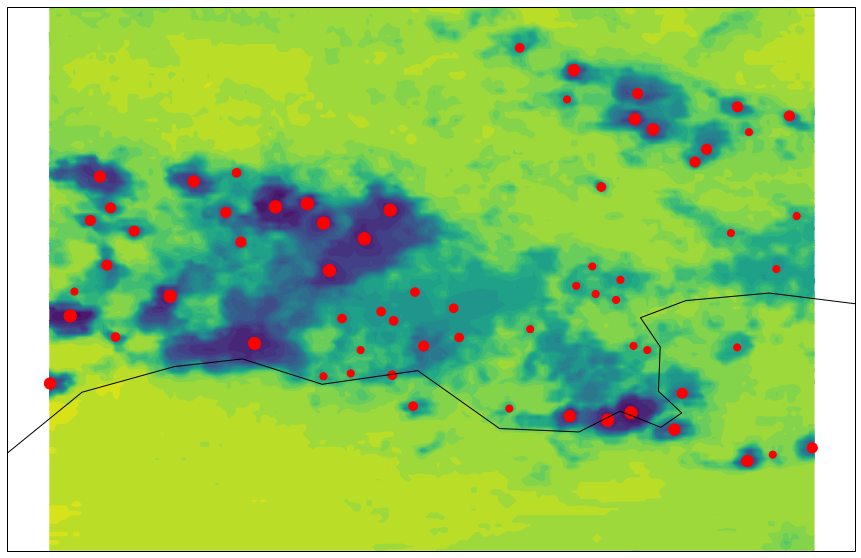

In [54]:
fig = plt.figure( figsize = (18,10))
# Draw the contour with 25 levels.
iplt.contourf(OLR[0], 25)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

plt.scatter(fsub.longitude, fsub.latitude, c = 'r', s = 300 - fsub.threshold_value)

In [52]:
fsub

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude
0,0,2,23.000000,173.000000,1,250,1,2013-06-19 21:32:23,2013-06-19 21:32:23,28.910470,-88.386986
1,0,6,34.000000,110.000000,1,250,2,2013-06-19 21:32:23,2013-06-19 21:32:23,29.330235,-90.791096
2,0,8,41.730609,65.554883,10,250,3,2013-06-19 21:32:23,2013-06-19 21:32:23,29.625239,-92.487142
3,0,9,42.433674,72.072979,4,250,4,2013-06-19 21:32:23,2013-06-19 21:32:23,29.652068,-92.238409
4,0,10,48.641181,164.496537,26,250,5,2013-06-19 21:32:23,2013-06-19 21:32:23,29.888949,-88.711482
5,0,11,48.000000,74.434266,2,250,6,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-92.148301
6,0,12,48.000000,143.000000,1,250,7,2013-06-19 21:32:23,2013-06-19 21:32:23,29.864481,-89.531800
7,0,13,49.000000,139.706587,2,250,8,2013-06-19 21:32:23,2013-06-19 21:32:23,29.902642,-89.657479
8,0,16,53.000000,115.000000,1,250,9,2013-06-19 21:32:23,2013-06-19 21:32:23,30.055284,-90.600294
9,0,17,60.000000,135.534993,2,250,10,2013-06-19 21:32:23,2013-06-19 21:32:23,30.322407,-89.816669
